In [1]:
import numpy as np


#########################
# Temporary data import #
#########################

from DAQRead import *
raw = DAQReader('spectrum_for_1p3eV.raw')
raw.read_pulses()
shape_data = raw.data['data'].shape
traces = np.reshape(raw.data['data'], (shape_data[0], 1, shape_data[1]))
channels = np.reshape(np.tile([1, -1], shape_data[0]), (shape_data[0], 2))
indeces = np.reshape(np.repeat(np.arange(shape_data[0]), 2), (shape_data[0],2))

traces = traces.reshape(8654, 32768)


In [23]:
def filter_and_group_traces(traces):
    # Step 1: Compute mean of each trace
    trace_means = np.mean(traces, axis=1)
    
    # Step 2: Filter traces with mean in (4700, 5600)
    mask_mean = (trace_means > 4700) & (trace_means < 5600)
    filtered_traces = traces[mask_mean]
    filtered_means = trace_means[mask_mean]
    
    # Step 3: Compute the baseline (mean of first 2048 samples) for each filtered trace
    baselines = np.mean(filtered_traces[:, :2048], axis=1)
    
    # Step 4: Keep traces where baseline is between 129 and 133
    mask_baseline = (baselines > 129) & (baselines < 133)
    final_traces = filtered_traces[mask_baseline]
    final_means = filtered_means[mask_baseline]
    final_baselines = baselines[mask_baseline]
    
    # Step 5: Compute height (Max - Min) for remaining traces
    heights = np.max(final_traces, axis=1) - np.min(final_traces, axis=1)
    
    # Step 6: Separate traces into two groups based on height
    group1_mask = (heights > 10400) & (heights < 10600)
    group2_mask = (heights > 11400) & (heights < 11600)
    
    group1_traces = final_traces[group1_mask]
    group2_traces = final_traces[group2_mask]
    group1_heights = heights[group1_mask]
    group2_heights = heights[group2_mask]
    
    print(f"Total traces: {traces.shape[0]}")
    print(f"Filtered by mean (4700, 5600): {filtered_traces.shape[0]}")
    print(f"Filtered by baseline (129, 133): {final_traces.shape[0]}")
    print(f"Group 1 (Height 10500-10600): {group1_traces.shape[0]}")
    print(f"Group 2 (Height 11400-11600): {group2_traces.shape[0]}")
    
    return group1_traces, group2_traces, group1_heights, group2_heights


In [24]:
gp1, gp2, gp1h, gp2h = filter_and_group_traces(traces)

Total traces: 8654
Filtered by mean (4700, 5600): 8284
Filtered by baseline (129, 133): 5086
Group 1 (Height 10500-10600): 4364
Group 2 (Height 11400-11600): 499


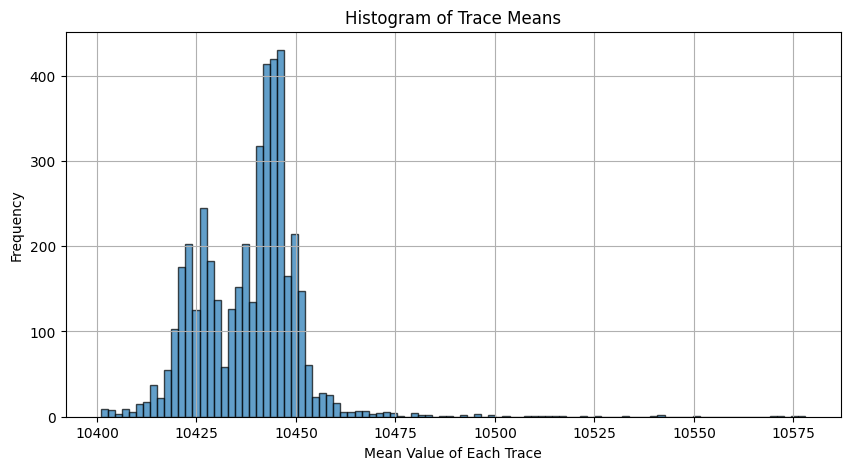

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(gp1h, bins=100, edgecolor='black', alpha=0.7)  # Adjust bins if needed
plt.xlabel("Mean Value of Each Trace")
plt.ylabel("Frequency")
plt.title("Histogram of Trace Means")
plt.grid(True)

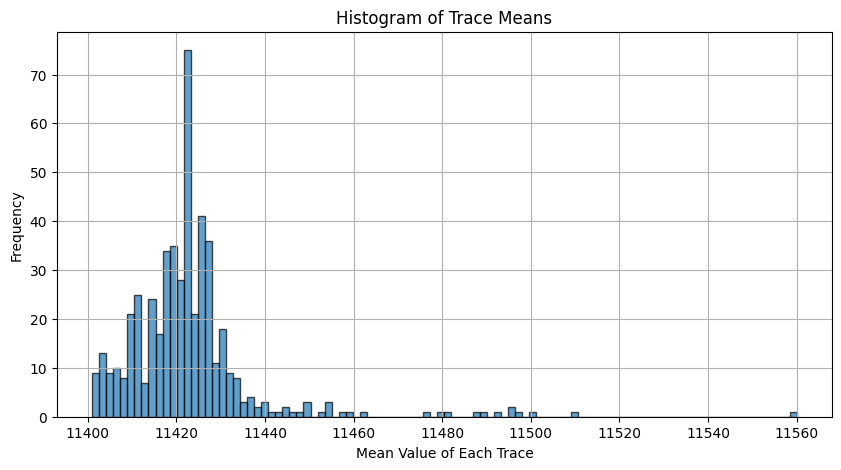

In [26]:
height_trace = np.max(traces, axis=1) - np.min(traces, axis=1)
plt.figure(figsize=(10, 5))
plt.hist(gp2h, bins=100, edgecolor='black', alpha=0.7)  # Adjust bins if needed
plt.xlabel("Mean Value of Each Trace")
plt.ylabel("Frequency")
plt.title("Histogram of Trace Means")
plt.grid(True)